# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Robi Ardiansyah
- **Email:** robiardian1987@ggmail.com
- **ID Dicoding:** robi_ardiansyah

## Menentukan Pertanyaan Bisnis

- penyewaan sepede paling banyak pada musim apa ?
- Apakah ada peran dari cuaca terhadap jumlah pengguna sepeda?
- Apakah ada korelasi antara suhu yang mengindikasikan kondisi saat aktivitas penyewaan sepeda sedang tinggi?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import calendar

## Data Wrangling

### Gathering Data

In [2]:
# Memuat tabel day
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Memuat tabel hour
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
# memeriksa tipe data data dari tiap kolom yang terdapat dalam hour_df dan day_df.
hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [5]:
# mengecek keberadaan missing value di dataset day_df
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# mengecek keberadaan missing value di dataset hour_df
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- Tidak ada missing value

In [7]:
# memeriksa duplikasi
print("Jumlah duplikasi data hour.csv: ", hour_df.duplicated().sum())
print("Jumlah duplikasi data day.csv: ", day_df.duplicated().sum())


Jumlah duplikasi data hour.csv:  0
Jumlah duplikasi data day.csv:  0


In [8]:
#Mengecek apakah terdapat keanehan pada nilai statistiknya
hour_df.describe()


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [9]:
#Mengecek apakah terdapat keanehan pada nilai statistiknya
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


- perintah .deescribe menampilkan ringkasan statistik deskriptif, dan tidak ada keanehan pada nilai statistiknya.

### Cleaning Data

### Clening hour.csv

In [10]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset hour_df
hour_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [11]:
# ubah variabel tanggal menjadi tipe data tanggal
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [12]:
hour_df.head()

,instant,dteday,season,year,month,hours,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [13]:
# temukan hari kerja dari setiap tanggal yang sesuai
hour_df['weekday'] = hour_df['dteday'].dt.day_name()

In [14]:
hour_df.head()

,instant,dteday,season,year,month,hours,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,weekday
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Saturday
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Saturday
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,Saturday
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,Saturday
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,Saturday


In [15]:
# ganti nilai integer musim dengan setiap musim terkait
def find_season(season):
    season_string = {1:'Spring', 2:'Summer', 3:'Fall', 4:'winter'}
    return season_string.get(season)

season_list = []

for season in hour_df['season']:
    season = find_season(season)
    season_list.append(season)

hour_df['season'] = season_list

In [16]:
hour_df['yr'] = hour_df['dteday'].dt.year

In [17]:
hour_df.head()

,instant,dteday,season,year,month,hours,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,weekday,yr
0,1,2011-01-01,Spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Saturday,2011
1,2,2011-01-01,Spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Saturday,2011
2,3,2011-01-01,Spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,Saturday,2011
3,4,2011-01-01,Spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,Saturday,2011
4,5,2011-01-01,Spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,Saturday,2011


In [18]:
hour_df.head()

,instant,dteday,season,year,month,hours,holiday,one_of_week,workingday,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,weekday,yr
0,1,2011-01-01,Spring,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Saturday,2011
1,2,2011-01-01,Spring,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Saturday,2011
2,3,2011-01-01,Spring,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,Saturday,2011
3,4,2011-01-01,Spring,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,Saturday,2011
4,5,2011-01-01,Spring,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,Saturday,2011


### Clening day.csv

In [19]:
# Mengganti nama kolom agar lebih mudah dibaca di dataset day_df
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [20]:
# ganti nilai integer musim dengan setiap musim terkait
def find_season(season):
    season_string = {1:'Spring', 2:'Summer', 3:'Fall', 4:'winter'}
    return season_string.get(season)

season_list = []

for season in day_df['season']:
    season = find_season(season)
    season_list.append(season)

day_df['season'] = season_list

In [21]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [22]:
day_df.weather_situation.replace((1,2,3,4), ('Clear/Partly Cloudy','Misty/Cloudy','Light Snow/Rain','Severe Weather'), inplace=True)

In [23]:
hour_df.to_csv('hour_cleaned.csv', index=False)


In [24]:
day_df.to_csv('day_cleaned.csv', index=False)


## Exploratory Data Analysis (EDA)

### Explore

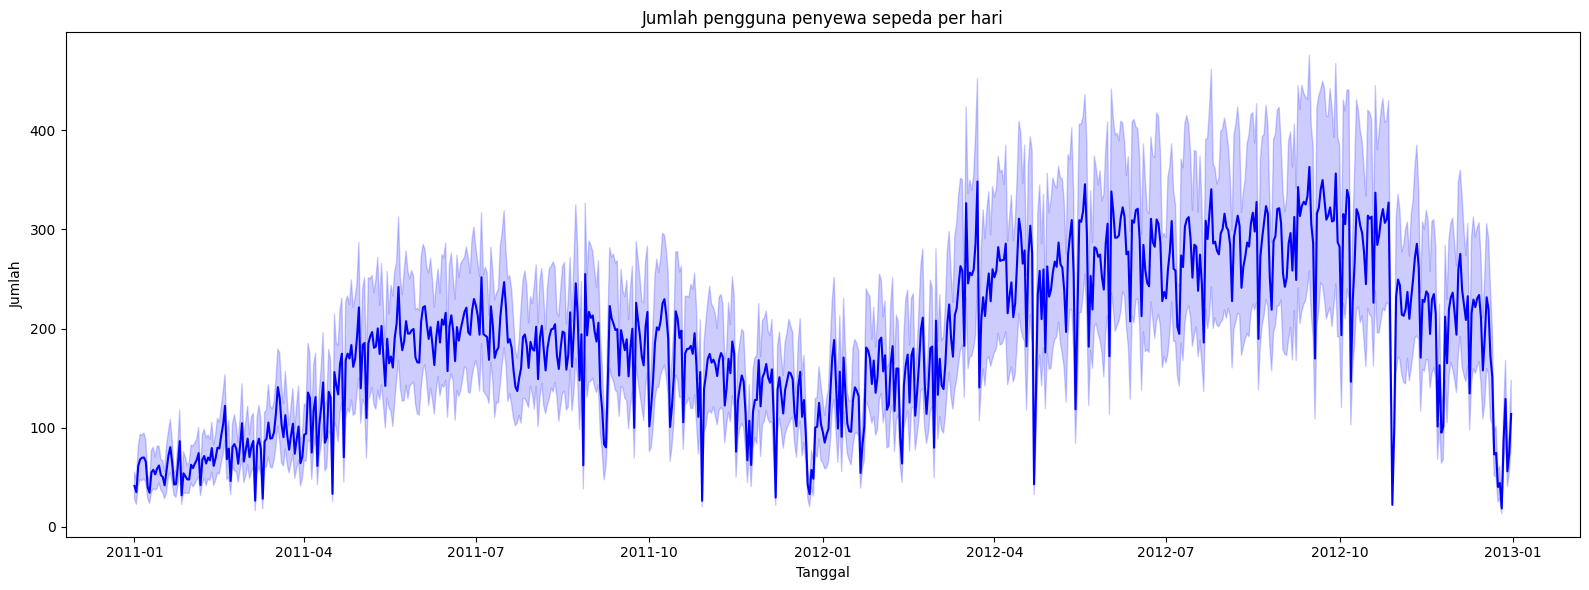

In [25]:
plt.figure(figsize=(16,6))

# Membuat plot garis menggunakan fungsi sns.lineplot()
sns.lineplot(x="dteday", y="count_cr", data=hour_df, color='blue')

# Menambahkan label dan judul ke plot
plt.xlabel("Tanggal")
plt.ylabel("Jumlah")
plt.title("Jumlah pengguna penyewa sepeda per hari")

# Menampilkan plot
plt.tight_layout()
plt.show()


- Jumlah perjalanan mulai rendah di setiap awal tahun, lalu mulai meningkat di pertengahan tahun, lalu menurun menjelang akhir tahun.

C:\Users\User\AppData\Local\Temp\ipykernel_11984\3228705199.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\User\AppData\Local\Temp\ipykernel_11984\3228705199.py:4: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(


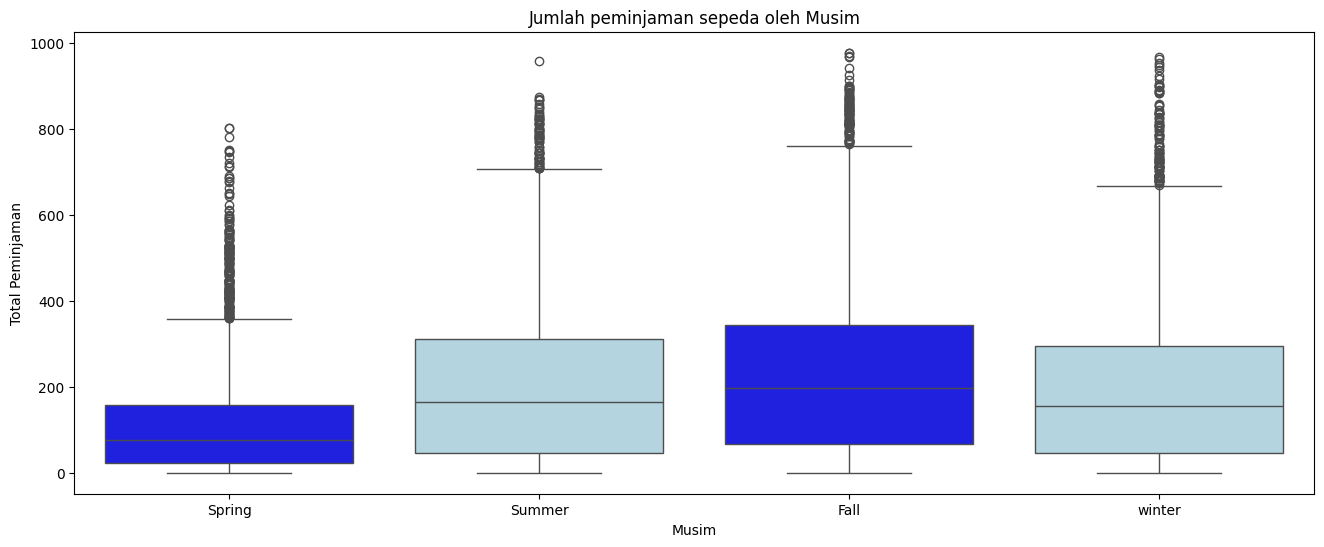

In [26]:
plt.figure(figsize=(16,6))

# Membuat boxplot menggunakan fungsi sns.boxplot()
sns.boxplot(
    x="season",
    y="count_cr",
    data=hour_df,
    palette=["blue", "lightblue"]
)

# Menambahkan label dan judul ke dalam plot
plt.xlabel("Musim")
plt.ylabel("Total Peminjaman")
plt.title("Jumlah peminjaman sepeda oleh Musim")

# Menampilkan plot
plt.show()


- Jumlah penyewaan sepeda paling rendah di musim dingin, dan tertinggi di musim panas.

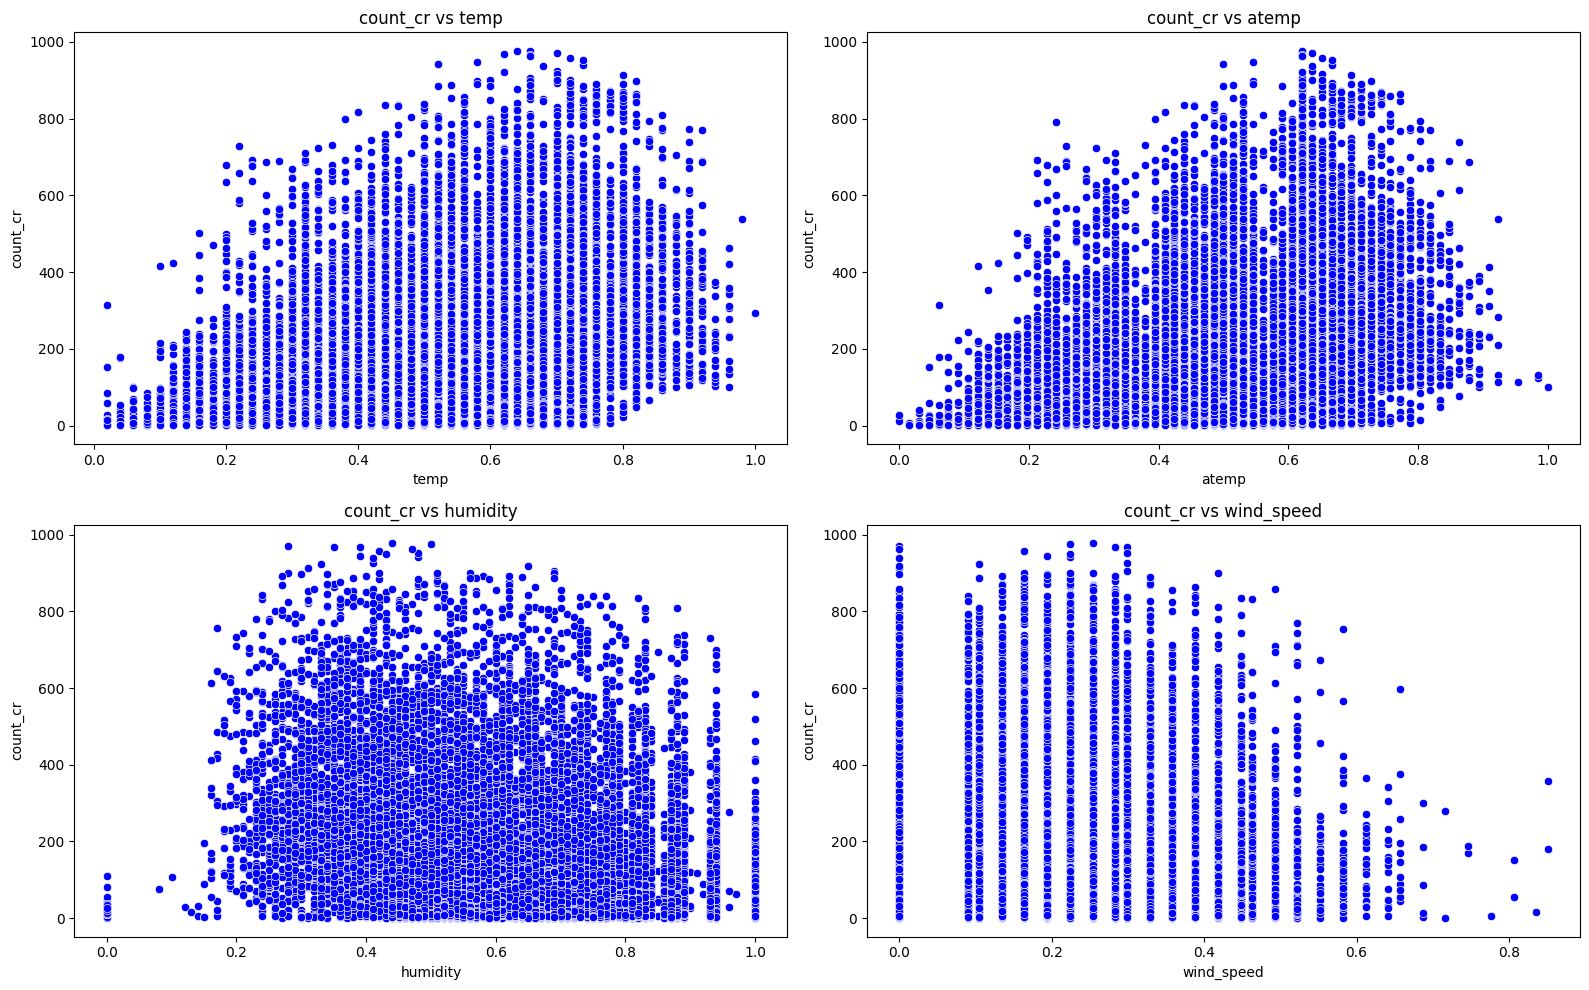

In [27]:
# Buat sebuah gambar dengan 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Iterasi melalui variabel lainnya dan buat scatterplot untuk masing-masing
for i, col in enumerate(hour_df.columns[10:14]):
    sns.scatterplot(x=col, y='count_cr', data=hour_df, ax=axs[i // 2, i % 2], color='blue')
    axs[i // 2, i % 2].set_title(f'count_cr vs {col}')

# Sesuaikan tata letak subplot
plt.tight_layout()

# Tampilkan plot
plt.show()


- Plot sebaran cnt vs. temp dan cnt vs. atemp menunjukkan bahwa jumlah perjalanan meningkat seiring dengan peningkatan suhu. Sepertinya ada korelasi antara suhu dan jumlah perjalanan .
- Plot sebar hum vs. cnt tidak menunjukkan korelasi.
- Plot sebaran cnt vs. kecepatan angin menunjukkan bahwa jumlah perjalanan  tampaknya menurun seiring dengan peningkatan kecepatan angin.

## Visualization & Explanatory Analysis

### Pertanyaan 1: penyewaan sepede paling banyak pada musim apa ?

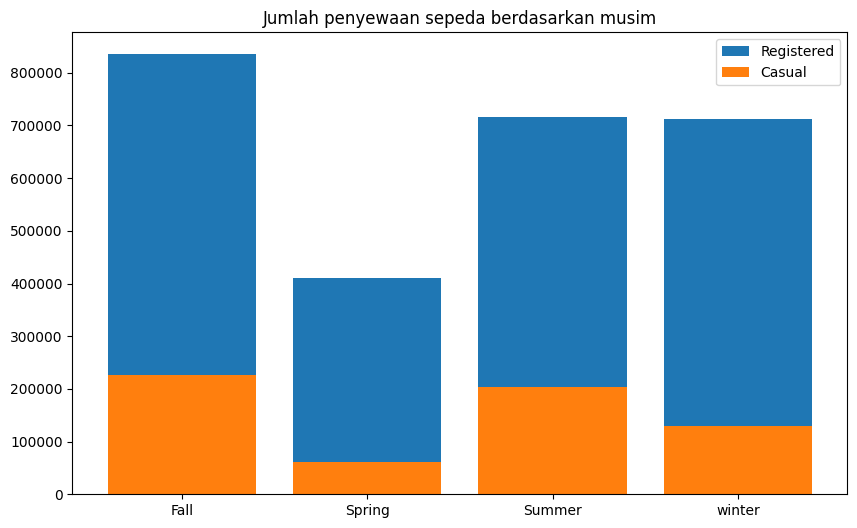

In [28]:
# Mengelompokkan data berdasarkan musim dan menghitung jumlah penggunaan terdaftar dan tidak terdaftar
seasonal_usage = day_df.groupby('season')[['registered', 'casual']].sum().reset_index()

plt.figure(figsize=(10, 6))

# Membuat
plt.bar(
    seasonal_usage['season'],
    seasonal_usage['registered'],
    label='Registered',
    color='tab:blue'
)

plt.bar(
    seasonal_usage['season'],
    seasonal_usage['casual'],
    label='Casual',
    color='tab:orange'
)

plt.xlabel(None)
plt.ylabel(None)
plt.title('Jumlah penyewaan sepeda berdasarkan musim')
plt.legend()
plt.show()

- Berdasarkan hasil analisis menggunakan barplot di atas, dapat disimpulkan bahwa musim yang paling disukai oleh para pengguna sepeda (baik Casual maupun Registered) adalah musim gugur (Fall), diikuti oleh musim panas (Summer), musim dingin (Winter), dan terakhir adalah musim semi (Spring).

### Pertanyaan 2: Apakah ada peran dari cuaca terhadap jumlah pengguna sepeda?

C:\Users\User\AppData\Local\Temp\ipykernel_11984\1197246741.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


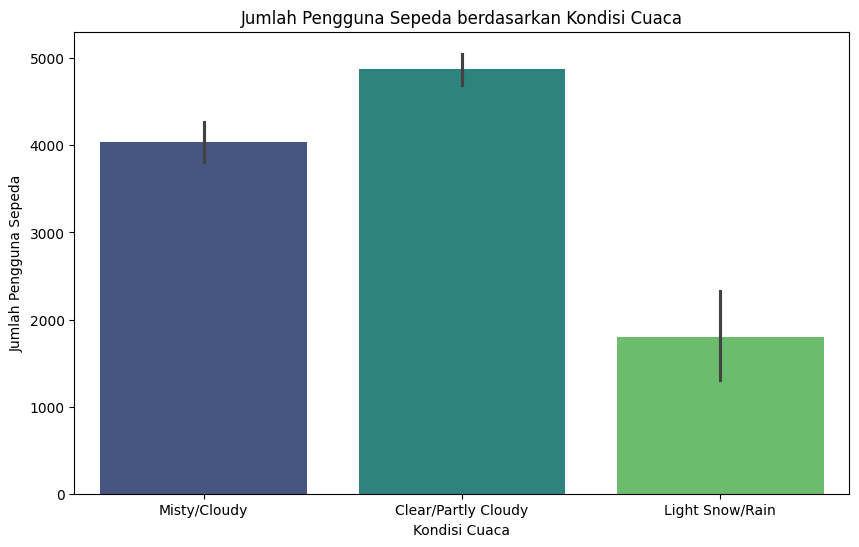

In [29]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='weather_situation',
    y='count_cr',
    data=day_df,
    palette='viridis')

plt.title('Jumlah Pengguna Sepeda berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.show()


- Dari analisis menggunakan boxplot, dapat disimpulkan bahwa terdapat korelasi yang jelas antara kondisi cuaca dan jumlah penyewa sepeda. Kondisi cuaca cerah/setengah mendung menarik minat paling banyak, diikuti oleh kondisi berkabut/mendung, sementara kondisi sedikit bersalju/hujan menjadi yang paling kurang diminati.

### Pertanyaan 3: Apakah ada korelasi antara suhu yang mengindikasikan kondisi saat aktivitas penyewaan sepeda sedang tinggi?

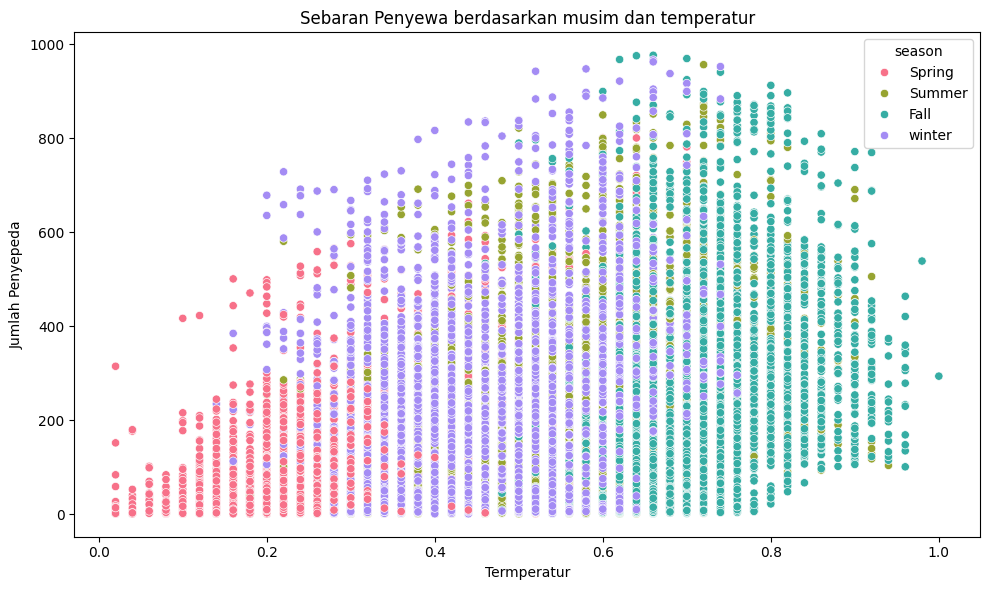

In [30]:
plt.figure(figsize=(10,6))

# Menentukan palette dengan warna yang berbeda untuk setiap musim
season_palette = sns.color_palette("husl", 4)  # 4 adalah jumlah musim yang berbeda

sns.scatterplot(x='temp', y='count_cr', data=hour_df, hue='season', palette=season_palette)

plt.xlabel("Termperatur")
plt.ylabel("Jumlah Penyepeda")
plt.title("Sebaran Penyewa berdasarkan musim dan temperatur")

# Show the plot
plt.tight_layout()
plt.show()

- Ketika suhu rendah, penggunaan sepeda juga rendah, terutama saat musim dingin.
- Saat suhu naik, penggunaan sepeda meningkat, terutama selama musim panas.
- Namun, terdapat suhu ideal di mana penggunaan sepeda mencapai puncaknya, terutama pada musim gugur dan musim panas, yaitu antara 20°C hingga 30°C.
- Pada hari-hari dengan suhu tersebut, diperkirakan penggunaan sepeda akan tinggi.

## Conclusion

- Conclution pertanyaan 1 :  penyewaan sepeda paling banyak terjadi pada musim gugur
- Conclution pertanyaan 2 : Terdapat korelasi yang jelas di antara keduanya. Pengguna sepeda sangat cenderung memilih cuaca yang Cerah/Sedikit mendung, dengan jumlah pengguna tertinggi . Pada posisi kedua, cuaca Berkabut/Mendung juga menarik minat, dengan jumlah pengguna di antara 3000 hingga 5000. Namun, pengguna kurang antusias saat cuaca Sedikit bersalju/Hujan, dengan jumlah pengguna rendah. Tidak ada data untuk cuaca Badai Besar, karena memang tidak mungkin untuk bersepeda dalam kondisi cuaca seperti itu.

- Conclution pertanyaan 3 : Terdapat korelasi sedang antara suhu dan jumlah perjalanan bikeshare. Jumlah perjalanan paling rendah terjadi pada suhu yang lebih dingin, yang terjadi selama musim dingin, dan mulai meningkat saat suhu naik, yang terjadi pada musim panas. Namun, ada "suhu enak" atau rentang suhu di mana jumlah perjalanan paling tinggi, yaitu antara 20°C dan 30°C. Rentang suhu ini umumnya terjadi selama musim panas dan musim gugur. Pada hari-hari dengan kondisi suhu seperti ini jumlah penyewaan sepeda tinggi yang tinggi.


## Rekomendasi agar penggunaan sepeda meningkat

1. Musim gugur sebagai Puncak Penyewaan Sepeda:

- Meningkatkan ketersediaan sepeda dan layanan terkait selama musim gugur, karena itu adalah saat puncak permintaan.
- Menawarkan promosi atau diskon khusus untuk menyewa sepeda selama musim gugur untuk menarik lebih banyak pelanggan.
2. Korelasi antara Cuaca dan Jumlah Pengguna:

- Mengintensifkan promosi dan periklanan pada cuaca cerah atau sedikit mendung karena jumlah pengguna tertinggi terjadi pada kondisi cuaca tersebut.
- Meskipun cuaca berkabut/mendung menarik minat, perhatikan bahwa jumlah pengguna mungkin tetap rendah dibandingkan dengan cuaca cerah.
- Menyediakan opsi alternatif atau layanan khusus seperti penyediaan mantel hujan atau payung saat cuaca sedikit bersalju/hujan untuk meningkatkan kenyamanan dan kepuasan pelanggan.
Korelasi antara Suhu dan Jumlah Perjalanan Bikeshare:

3. Meningkatkan layanan dan promosi di sekitar "suhu enak" suhu antara 20°C dan 30°C.
- Menyediakan layanan tambahan seperti air minum dingin atau penawaran spesial untuk perjalanan yang dilakukan pada suhu ideal tersebut.
- Mengoptimalkan ketersediaan sepeda dan stok di sekitar periode musim gugur dan musim panas ketika permintaan tertinggi.